In [1]:
# objective: generate the particle size structure for the CMIP6 models
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob,os,subprocess
from glob import glob
import IPython.display as display
%matplotlib inline
from datetime import datetime as dt
import matplotlib.gridspec as gridspec
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as st

<h1><center> Mean climatology and data </center></h1>

In [2]:
df_climatology_full = pd.read_csv('/Users/mc4214/Documents/CMIP6_PSS_paper/data/biom_climatology_all_biovolume.csv', sep= ',', index_col = False)
df_climatology_full['biovol_log']=np.log10(df_climatology_full.total_biovolume)
#df_climatology_full = df_climatology_full.loc[(df_climatology_full.source != 'GISS')].reset_index(drop=True)
df_clim_mean = df_climatology_full.astype(dict(zip(['month'],[str]))).groupby(['month', 'experiment', 'biomes','source']).apply(lambda x: pd.Series({

                                                                    'slope':np.nanmean(x.slope),
                                                                    'intercept':np.nanmean(x.intercept),
                                                                    'R2':np.nanmean(x.R2),
                                                                    'total_biovolume':np.nanmean(x.total_biovolume)})).reset_index()
#df_clim_mean['source'] = 'models'
df_clim_mean['month'] = df_clim_mean['month'].astype('float')
df_climatology_full['intercept_un']= (df_climatology_full['intercept'])#10**(df_climatology_full['intercept'])
df_clim_mean

,month,experiment,biomes,source,slope,intercept,R2,total_biovolume
0,1.0,hist,HCPS,CESM,-1.045438,2.222158e+13,0.969922,3.441596e+13
1,1.0,hist,HCPS,CMCC,-1.137773,5.110398e+13,0.988469,1.024838e+14
2,1.0,hist,HCPS,CNRM,-1.234864,4.080175e+14,0.936662,3.965604e+13
3,1.0,hist,HCPS,GFDL,-1.152786,1.194688e+15,0.986870,4.184953e+14
4,1.0,hist,HCPS,GISS,-1.637000,6.849565e+17,0.951581,3.664698e+13
...,...,...,...,...,...,...,...,...
499,9.0,ssp5,LC,CNRM,-1.301719,4.687814e+14,0.951673,1.381815e+13
500,9.0,ssp5,LC,GFDL,-1.181614,6.319084e+14,0.994295,1.689340e+14
501,9.0,ssp5,LC,GISS,-1.815476,1.826182e+18,0.936676,4.292847e+12
502,9.0,ssp5,LC,IPSL,-1.309669,4.248652e+14,0.958397,1.144161e+13


In [3]:
from matplotlib.legend import Legend
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tick
def y_fmt(x, y):
    return '${:1.0e}'.format(x).replace('e', '\\times 10^{') + '}$'

In [4]:
df_climatology_full.loc[(df_climatology_full.source=='UKESM') & (df_climatology_full.experiment=='hist')]

,experiment,biomes,month,slope,intercept,R2,total_biovolume,source,biovol_log,intercept_un
435,hist,LC,1,-1.309613,2.041997e+14,0.989436,1.166794e+13,UKESM,13.066994,2.041997e+14
436,hist,HCSS,1,-1.196767,1.486443e+14,0.984948,1.185090e+13,UKESM,13.073751,1.486443e+14
437,hist,HCPS,1,-1.196476,1.994020e+14,0.986872,4.580065e+13,UKESM,13.660872,1.994020e+14
441,hist,LC,2,-1.318721,2.634560e+14,0.989176,1.327924e+13,UKESM,13.123173,2.634560e+14
442,hist,HCSS,2,-1.222635,2.376134e+14,0.984620,1.084820e+13,UKESM,13.035358,2.376134e+14
443,hist,HCPS,2,-1.189789,2.262287e+14,0.985919,5.464625e+13,UKESM,13.737560,2.262287e+14
447,hist,LC,3,-1.314579,2.930714e+14,0.988813,1.630853e+13,UKESM,13.212415,2.930714e+14
448,hist,HCSS,3,-1.248370,3.774004e+14,0.984041,1.407572e+13,UKESM,13.148471,3.774004e+14
449,hist,HCPS,3,-1.175882,2.233929e+14,0.984810,6.533059e+13,UKESM,13.815117,2.233929e+14
453,hist,LC,4,-1.300684,2.739580e+14,0.988489,1.896417e+13,UKESM,13.277934,2.739580e+14


In [5]:
df_climatology_full.source.unique()

array(['CESM', 'CMCC', 'CNRM', 'GFDL', 'GISS', 'IPSL', 'UKESM'],
      dtype=object)

In [6]:
df_PSSdb = pd.read_csv('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/PSSdb_data_full.csv', sep= ',')
df_PSSdb['intercept_un']= 10**(df_PSSdb['intercept'])
df_PSSdb['biovol_log']= np.log10(df_PSSdb['total_biovolume'])
df_PSSdb

,lat,lon,biomes,month,slope,intercept,R2,total_biovolume,season,experiment,source,intercept_un,biovol_log
0,80.5,69.5,HCSS,8.0,-0.71160,10.534895,0.94760,4.614245e+15,Summer,obs,PSSdb,3.426846e+10,15.664101
1,79.5,60.5,HCSS,8.0,-1.01360,13.587905,0.96615,9.110387e+16,Summer,obs,PSSdb,3.871730e+13,16.959537
2,79.5,66.5,HCSS,7.0,-0.72790,11.050613,0.86505,6.869221e+17,Summer,obs,PSSdb,1.123603e+11,17.836907
3,79.5,69.5,HCSS,8.0,-0.82940,12.245196,0.98330,1.754292e+17,Summer,obs,PSSdb,1.758717e+12,17.244102
4,79.5,71.5,HCSS,7.0,-0.68490,10.892050,0.95075,3.726014e+17,Summer,obs,PSSdb,7.799207e+10,17.571245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,-57.5,-67.5,HCSS,7.0,-0.58180,9.593316,0.90310,5.395755e+14,Summer,obs,PSSdb,3.920266e+09,14.732052
1213,-60.5,-60.5,HCSS,7.0,-1.01455,13.387113,0.94335,2.555399e+17,Summer,obs,PSSdb,2.438445e+13,17.407459
1214,-62.5,-49.5,HCSS,7.0,-0.64370,7.890369,0.97900,1.311426e+16,Summer,obs,PSSdb,7.769074e+07,16.117744
1215,-64.5,-53.5,HCSS,7.0,-0.72810,11.329196,0.94540,8.054770e+16,Summer,obs,PSSdb,2.134008e+11,16.906053


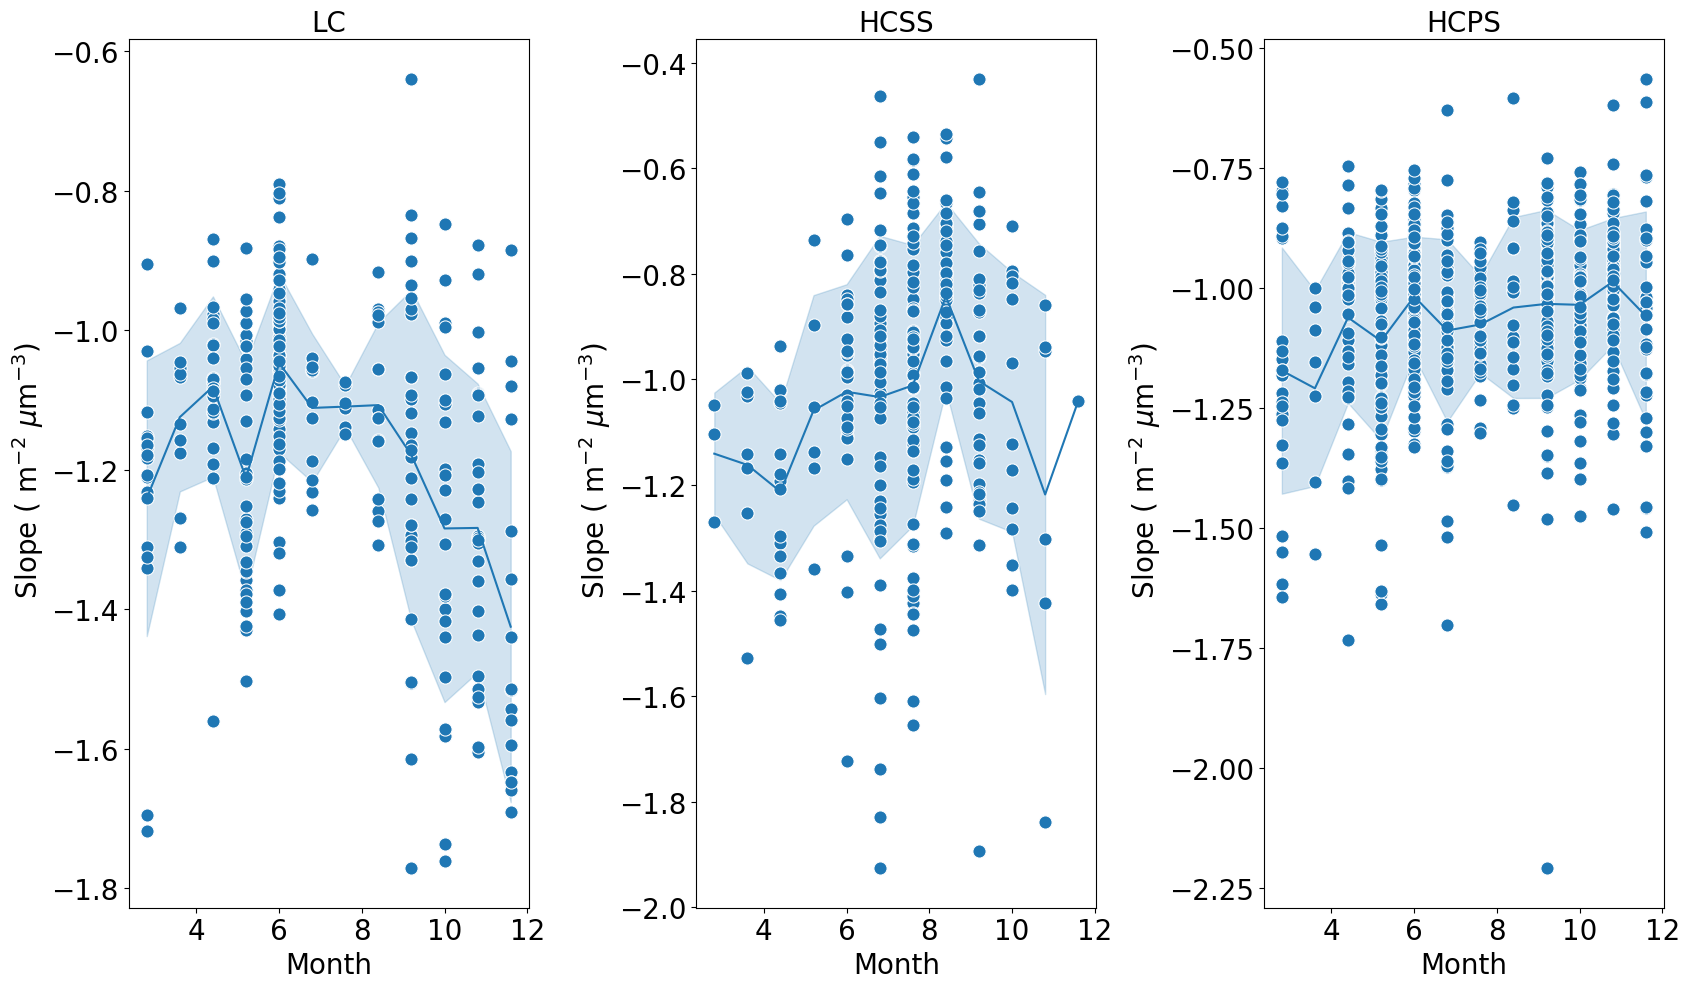

In [8]:
#df_climatology_full = df_climatology_full.loc[df_climatology_full.source != 'GISS'].reset_index()
biome_list = ['LC', 'HCSS', 'HCPS']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17,10))

for c, m in enumerate(biome_list):
    ax_n = axs[c]
    #palette = {'CESM': 'tab:red','CMCC': 'tab:blue','CNRM': 'tab:gray','GFDL': 'tab:green','IPSL': 'tab:yellow','UKESM': 'tab:purple'}
    sns.lineplot(ax = ax_n,x = 'month', y='slope',  data=df_PSSdb[df_PSSdb['biomes']== m], ci = 'sd')
    sns.scatterplot(ax=ax_n, x='month', y='slope',  s=90, data=df_PSSdb[df_PSSdb['biomes']== m])
    ax_n.set_title(m, fontsize=20)
    ax_n.tick_params(axis='both', which='major', labelsize=20)
    ax_n.set_ylabel(r' Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 20)
    ax_n.set_xlabel('Month', fontsize=20)
    ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
    #ax_n.set_ylim(-1.6, -1.2)

    ax_n.set_xticklabels([2,4,6,8,10,12], fontsize=20)
           
plt.tight_layout()
#plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_biomes_climatology_mean_slope_PSSdb_ONLY_w-CI_new_HCSS.pdf', dpi=300)


In [9]:
np.nanmin(df_PSSdb['intercept'])

6.2929584794248346

In [10]:
np.nanmax(df_PSSdb['intercept'])

25.17307844348342

In [11]:

df_PSSdb_mean = df_PSSdb.astype(dict(zip(['month'],[str]))).groupby(['source','month', 'experiment', 'biomes']).apply(lambda x: pd.Series({

                                                                    'slope':np.nanmean(x.slope),
                                                                    'intercept':np.nanmean(x.intercept),
                                                                    'R2':np.nanmean(x.R2),
    
                                                                    'total_biovolume':np.nanmean(x.biovol_log)})).reset_index()
    
df_PSSdb_mean['month'] = df_PSSdb_mean['month'].astype('float')
df_PSSdb_mean['total_biovolume']=10**(df_PSSdb_mean.total_biovolume)
df_PSSdb_mean['intercept_un']= 10**(df_PSSdb_mean['intercept'])
df_PSSdb_mean

,source,month,experiment,biomes,slope,intercept,R2,total_biovolume,intercept_un
0,PSSdb,1.0,obs,HCPS,-1.172470,14.497764,0.969098,1.197321e+16,3.146036e+14
1,PSSdb,1.0,obs,HCSS,-1.140587,13.421883,0.970421,6.791105e+15,2.641696e+13
2,PSSdb,1.0,obs,LC,-1.240656,15.054239,0.974592,3.779572e+15,1.133024e+15
3,PSSdb,10.0,obs,HCPS,-1.035480,13.367231,0.966694,2.518319e+16,2.329329e+13
4,PSSdb,10.0,obs,HCSS,-1.042693,13.379458,0.959509,3.770186e+16,2.395838e+13
5,PSSdb,10.0,obs,LC,-1.283974,15.040825,0.950611,3.540941e+15,1.098562e+15
6,PSSdb,11.0,obs,HCPS,-0.987511,13.031767,0.973445,1.571769e+16,1.075888e+13
7,PSSdb,11.0,obs,HCSS,-1.217904,14.287079,0.961039,7.714418e+15,1.936776e+14
8,PSSdb,11.0,obs,LC,-1.283196,15.150357,0.959163,3.043251e+15,1.413698e+15
9,PSSdb,12.0,obs,HCPS,-1.058606,13.640303,0.963506,1.403719e+16,4.368204e+13


In [12]:
#df_clim = pd.concat([df_clim_mean, df_PSSdb]).reset_index()
#df_climatology_full = pd.concat([df_climatology_full, df_PSSdb]).reset_index()


In [13]:
df_clim_mean.source.unique()

array(['CESM', 'CMCC', 'CNRM', 'GFDL', 'GISS', 'IPSL', 'UKESM'],
      dtype=object)

In [14]:
palette_source = dict(CESM= '#0077BB',CMCC= '#33BBEE', CNRM= '#009988',GFDL= '#EE7733', GISS= '#CC3311', IPSL= '#EE3377',UKESM= '#BBBBBB', PSSdb = 'black')
palette_experiments= dict(hist='rosybrown', ssp5='firebrick', obs='black')
letters_clim = ['a.','b.','c.',  'd.','e.','f.',  'g.','h.','i.']

In [15]:
df_hist= df_climatology_full.loc[(df_climatology_full.experiment == 'hist') & (df_climatology_full.source != 'GISS')]
df_hist_GISS= df_climatology_full.loc[(df_climatology_full.experiment == 'hist') & (df_climatology_full.source == 'GISS')]

In [16]:
df_hist

,experiment,biomes,month,slope,intercept,R2,total_biovolume,source,biovol_log,intercept_un
3,hist,LC,1,-1.080305,2.294635e+13,0.991856,2.857537e+13,CESM,13.455992,2.294635e+13
4,hist,HCSS,1,-1.006733,7.331634e+12,0.969564,1.223809e+13,CESM,13.087714,7.331634e+12
5,hist,HCPS,1,-1.045438,2.222158e+13,0.969922,3.441596e+13,CESM,13.536760,2.222158e+13
9,hist,LC,2,-1.084936,2.776936e+13,0.992999,3.301566e+13,CESM,13.518720,2.776936e+13
10,hist,HCSS,2,-1.024746,1.191607e+13,0.965857,1.382368e+13,CESM,13.140624,1.191607e+13
...,...,...,...,...,...,...,...,...,...,...
496,hist,HCSS,11,-1.168161,1.117542e+14,0.984588,2.483359e+13,UKESM,13.395040,1.117542e+14
497,hist,HCPS,11,-1.183816,1.534403e+14,0.987062,4.552917e+13,UKESM,13.658290,1.534403e+14
501,hist,LC,12,-1.297116,1.736440e+14,0.989549,1.191033e+13,UKESM,13.075924,1.736440e+14
502,hist,HCSS,12,-1.179054,1.145727e+14,0.984872,1.636295e+13,UKESM,13.213862,1.145727e+14


In [17]:

df_mean_experiments = df_climatology_full.astype(dict(zip(['month'],[str]))).groupby(['month', 'experiment', 'biomes']).apply(lambda x: pd.Series({

                                                                    'slope':np.nanmean(x.slope),
                                                                    'intercept':np.nanmean(x.intercept),
    
                                                                    'total_biovolume':np.nanmean(x.total_biovolume)})).reset_index()
df_mean_experiments['month'] = df_mean_experiments['month'].astype('float')
df_mean_experiments['intercept_un']= (df_mean_experiments['intercept'])#10**(df_mean_experiments['intercept'])
df_mean_experiments

,month,experiment,biomes,slope,intercept,total_biovolume,intercept_un
0,1.0,hist,HCPS,-1.239989,9.818270e+16,9.973092e+13,9.818270e+16
1,1.0,hist,HCSS,-1.203476,5.840702e+17,6.136817e+13,5.840702e+17
2,1.0,hist,LC,-1.320517,1.075970e+18,4.326653e+13,1.075970e+18
3,1.0,ssp5,HCPS,-1.239952,1.043958e+17,9.272577e+13,1.043958e+17
4,1.0,ssp5,HCSS,-1.208541,4.848359e+17,5.314541e+13,4.848359e+17
...,...,...,...,...,...,...,...
67,9.0,hist,HCSS,-1.197998,6.581462e+16,1.476997e+14,6.581462e+16
68,9.0,hist,LC,-1.299788,1.489711e+17,4.887802e+13,1.489711e+17
69,9.0,ssp5,HCPS,-1.234310,6.535265e+16,1.044384e+14,6.535265e+16
70,9.0,ssp5,HCSS,-1.208442,6.617136e+16,1.349359e+14,6.617136e+16


In [18]:
from matplotlib import ticker as mtick
from matplotlib.ticker import MaxNLocator

## Slope

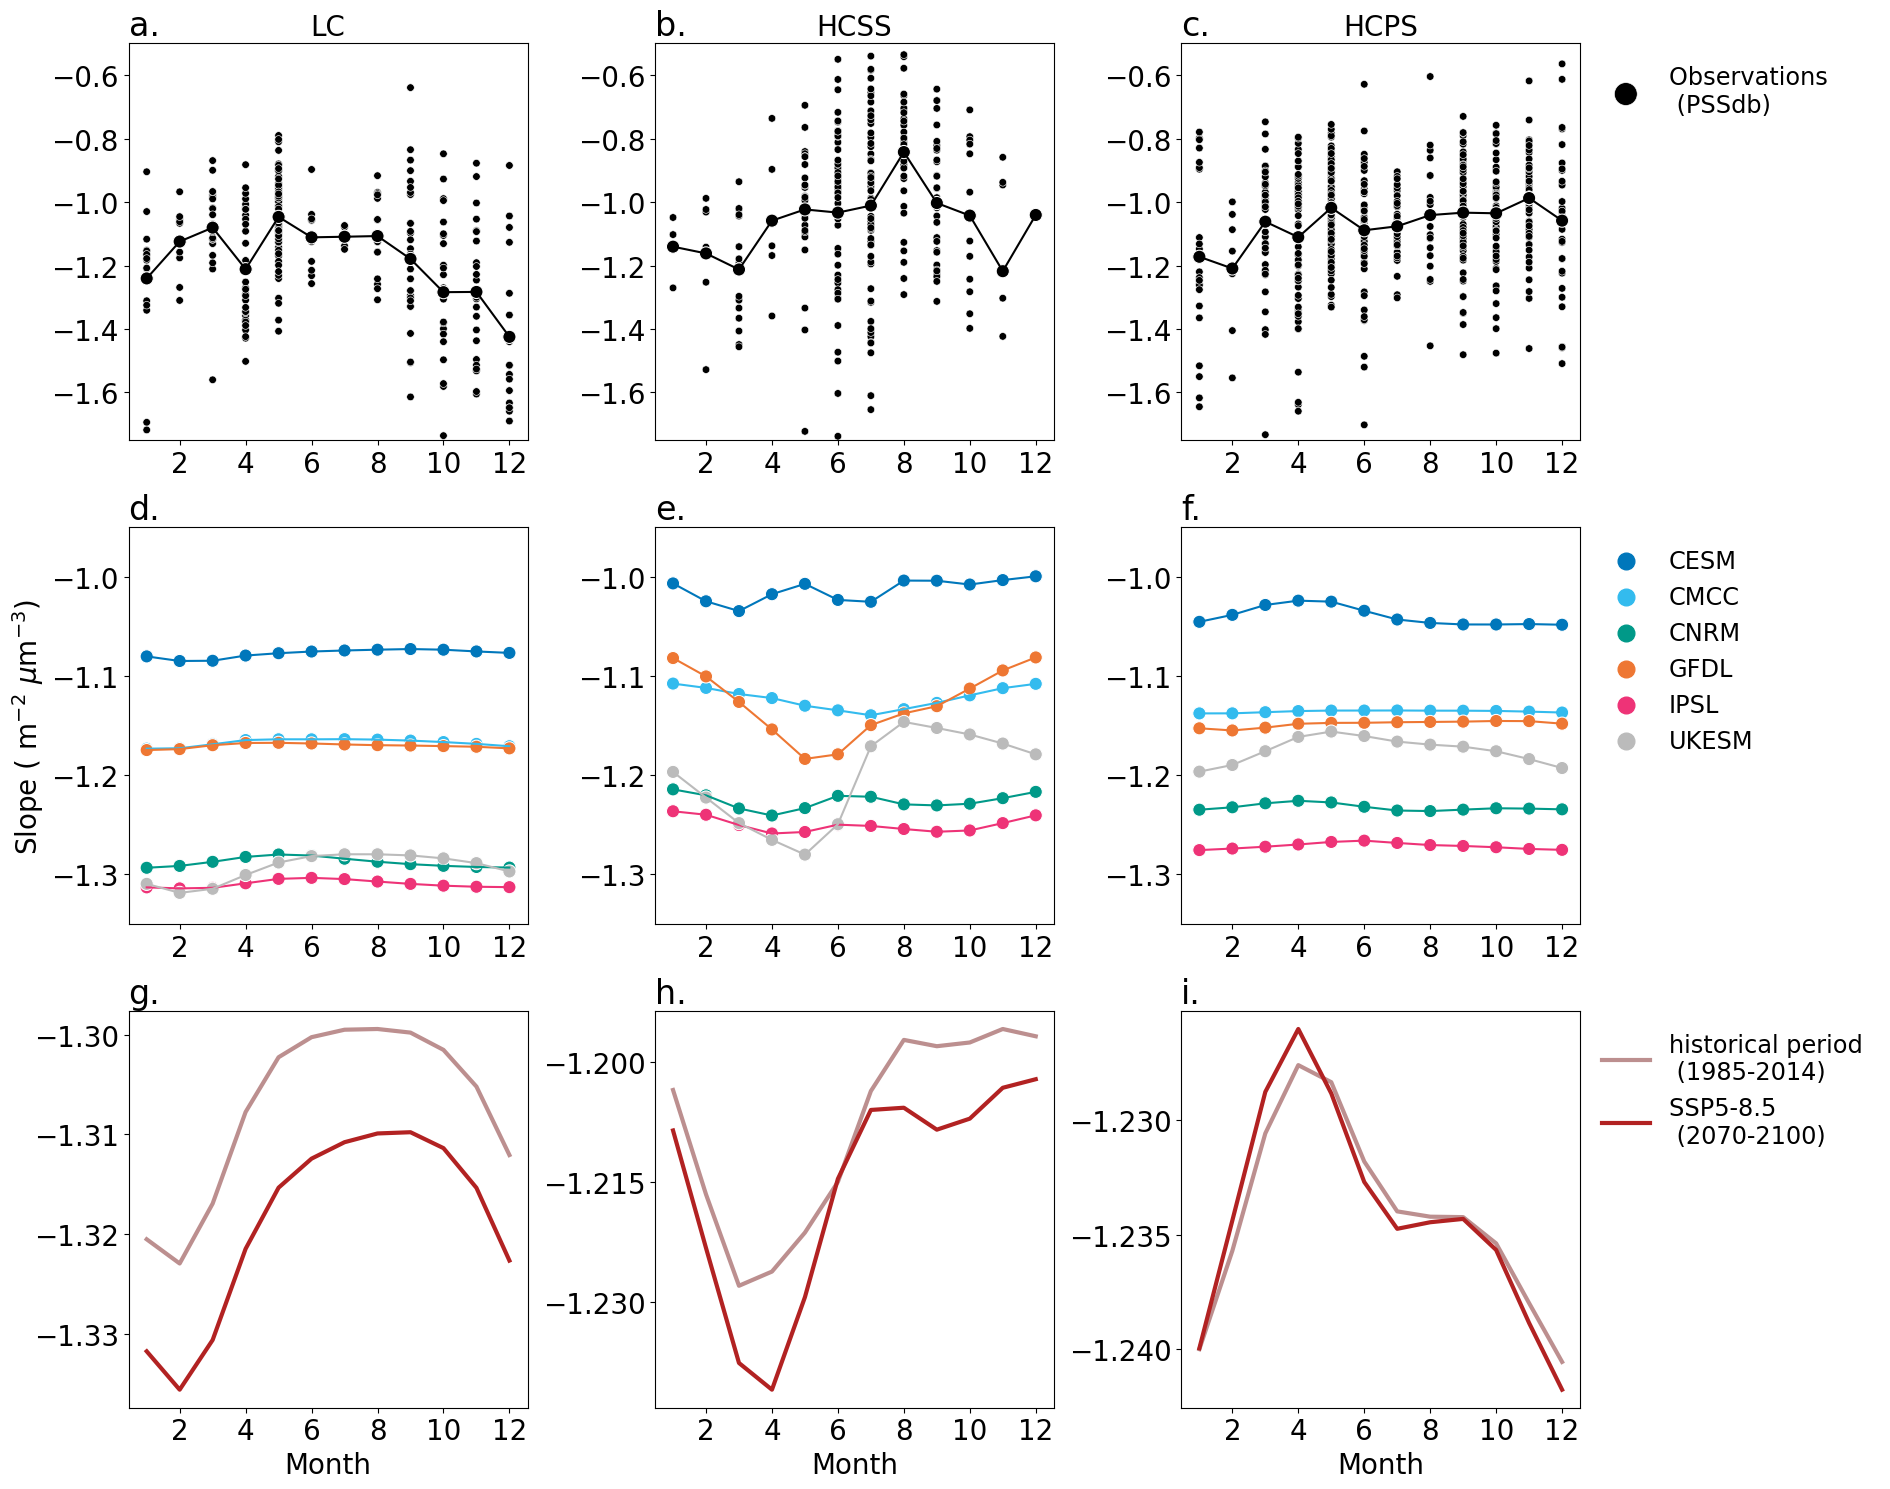

In [19]:
#df_climatology_full = df_climatology_full.loc[df_climatology_full.source != 'GISS'].reset_index()

biome_list = ['LC', 'HCSS', 'HCPS']
ind=0
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(19,15))
# these next lines ensure that only climatologies with negative correlation are plotted

for r in [0,1,2]:
    for c, m in enumerate(biome_list):
        ax_n = axs[r,c]
        ind +=1
        ax_n.set_title(letters_clim[ind-1], loc='left', fontsize=24)
        if r==0:
            sns.scatterplot(ax=ax_n, x='month', y='slope', hue='source', markers=[ "o"], palette=palette_source, s=30, data=df_PSSdb[df_PSSdb['biomes']== m], legend=False)
            sns.scatterplot(ax=ax_n, x='month', y='slope', hue='source', markers=[ "o"], palette=palette_source, s=90, data=df_PSSdb_mean[df_PSSdb_mean['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='slope', hue='source', palette=palette_source, data=df_PSSdb[df_PSSdb['biomes']== m], ci=None, legend=False)
            ax_n.set_title(m, fontsize=20)
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            ax_n.set_ylim( -1.75, -0.5)
            #if c <2:
                #ax_n.get_legend().remove()
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                ax_n.legend(['Observations \n (PSSdb)'],fontsize = 'xx-large',  markerscale=3, frameon=False, bbox_to_anchor=(1, 1))
        elif r==1:
            sns.scatterplot(ax=ax_n, x='month', y='slope', hue='source', markers=["o"], palette=palette_source, s=90, data=df_hist[df_hist['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='slope', hue='source', palette=palette_source, data=df_hist[df_hist['biomes']== m], legend=False)
            ax_n.set_title('')
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            if c==0:
                ax_n.set_ylabel(r'Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 20)
            else:
                ax_n.set_ylabel('')
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                ax_n.legend(fontsize = 'xx-large',  markerscale=2, frameon=False, bbox_to_anchor=(1, 1))
                
            #ax_n.set_yticklabels([-1.1, -0.9, -0.7], fontsize=20) #[-1.6, -1.4, -1.2, -1.0]
            ax_n.set_ylim(-1.35, -0.95)#
        else:
            #palette = {'CESM': 'tab:red','CMCC': 'tab:blue','CNRM': 'tab:gray','GFDL': 'tab:green','IPSL': 'tab:yellow','UKESM': 'tab:purple'}
            sns.lineplot(ax = ax_n,x = 'month', y='slope', hue = 'experiment',hue_order=['hist', 'ssp5', 'obs'],palette=palette_experiments, data=df_mean_experiments[df_mean_experiments['biomes']== m], linewidth = 3, ci=None)

            ax_n.set_title('')
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('Month', fontsize=20)
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            ax_n.yaxis.set_major_locator(plt.MaxNLocator(4))
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                ax_n.legend(['historical period \n (1985-2014)', 'SSP5-8.5 \n (2070-2100)'], fontsize = 'xx-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))
        ax_n.xaxis.set_major_locator(MaxNLocator(integer=True))
        
plt.tight_layout()
plt.savefig('/Users/mc4214/GIT/CMIP6_size_spectra/figures/fig_biomes_climatology_mean_slope_PSSdb_new_HCSS_No_GISS.pdf', dpi=300)

## Intercept

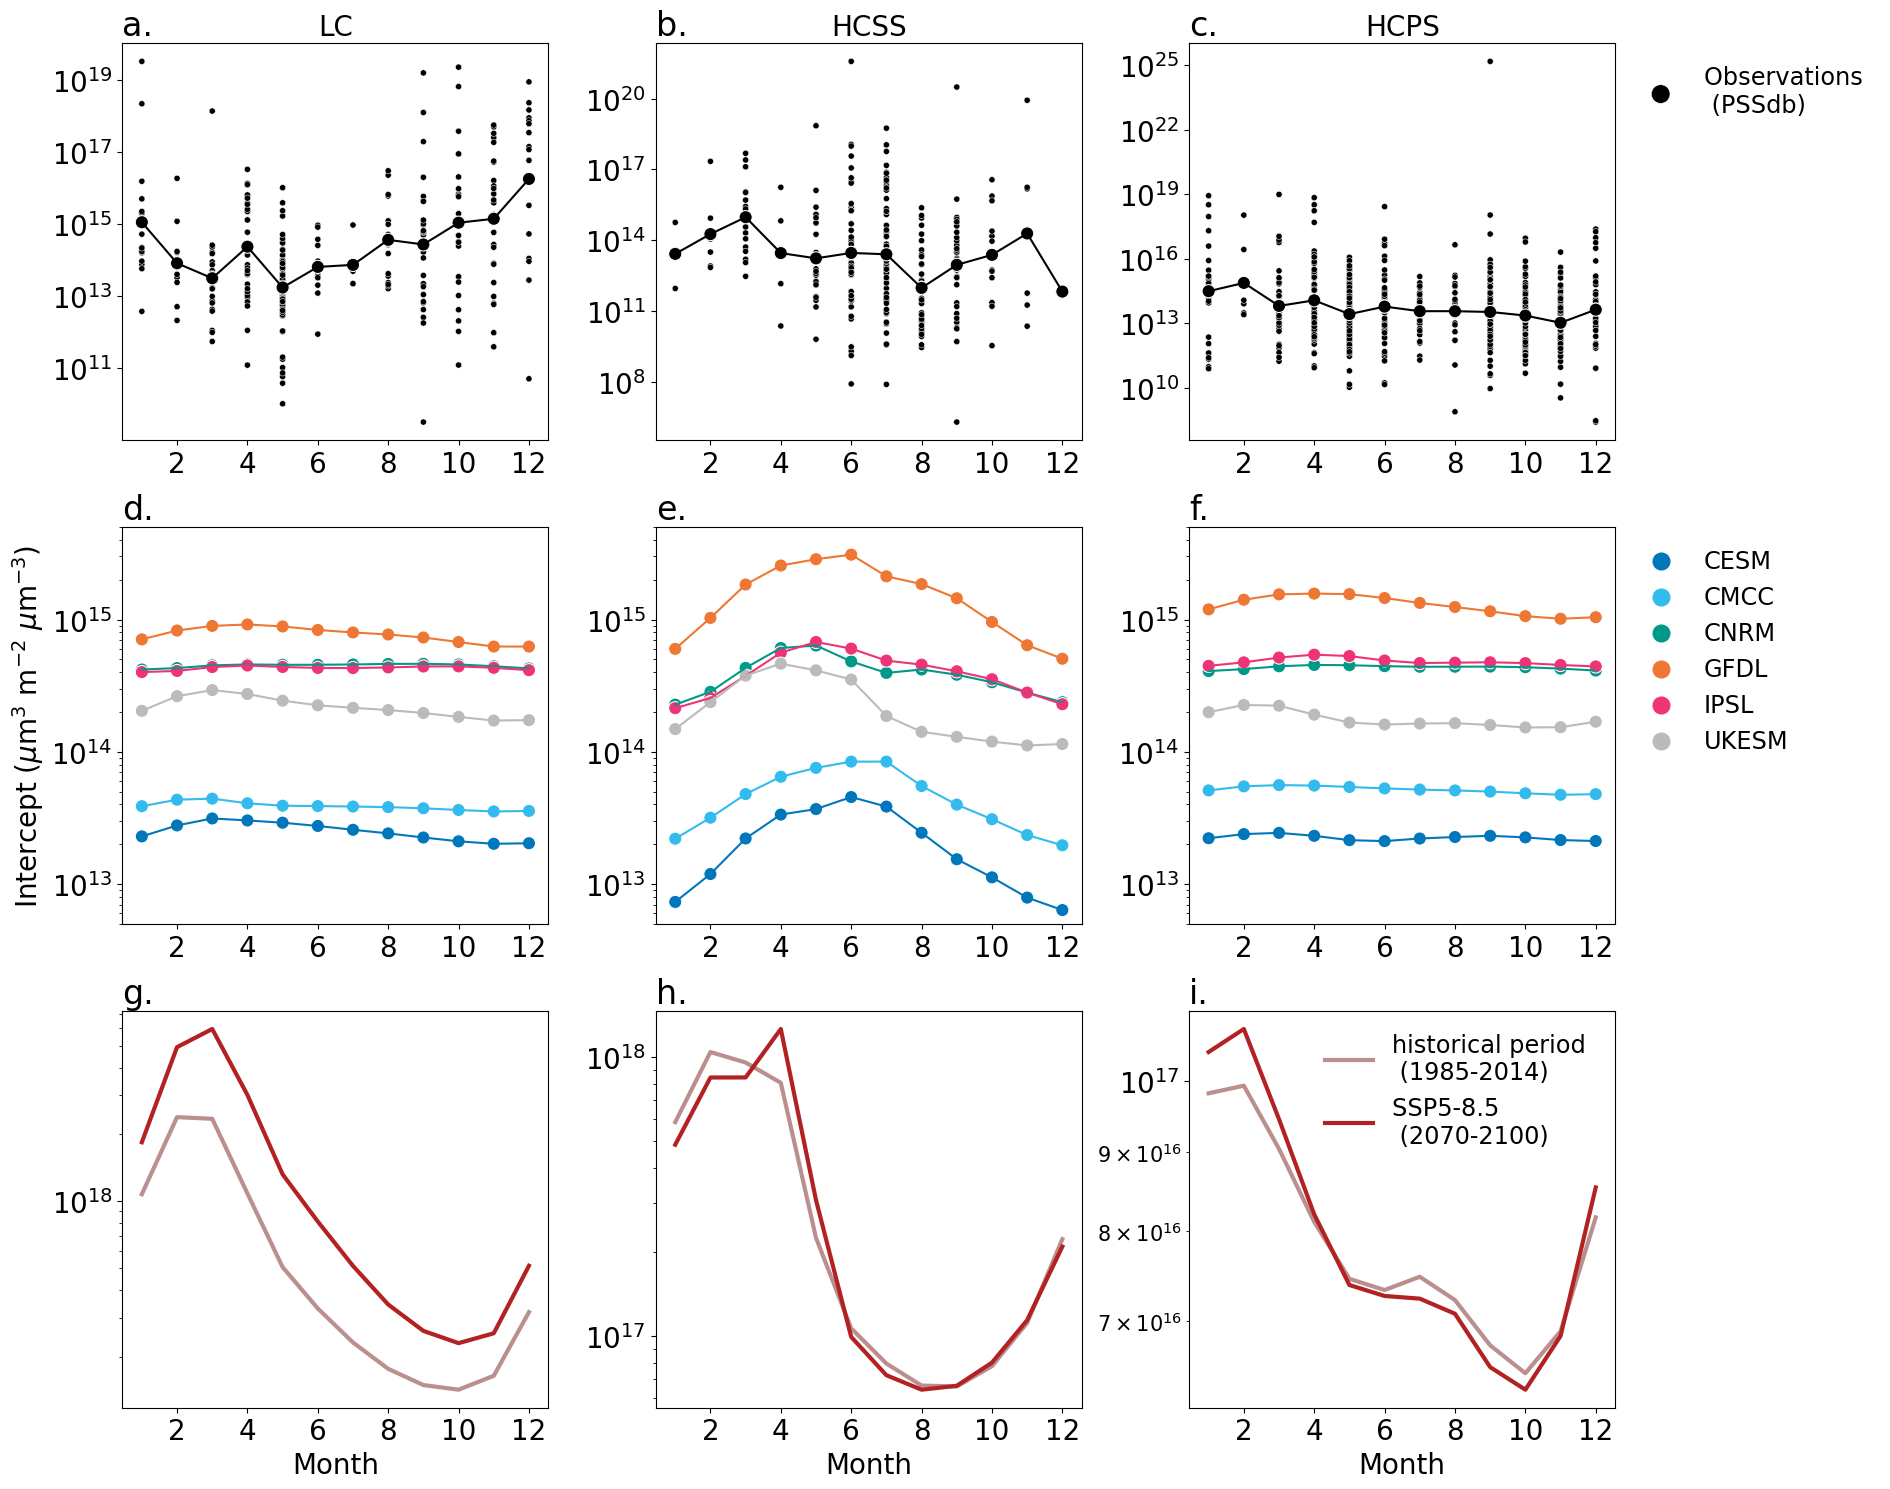

In [20]:
#df_climatology_full = df_climatology_full.loc[df_climatology_full.source != 'GISS'].reset_index()
biome_list = ['LC', 'HCSS', 'HCPS']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(19,15))
# these next lines ensure that only climatologies with negative correlation are plotted
ind=0
for r in [0,1,2]:
    for c, m in enumerate(biome_list):
        ax_n = axs[r,c]
        ind +=1
        ax_n.set_title(letters_clim[ind-1], loc='left', fontsize=24)
        if r==0:
            sns.scatterplot(ax=ax_n, x='month', y='intercept_un', hue='source', markers=[ "o"], palette=palette_source, s=20, data=df_PSSdb[df_PSSdb['biomes']== m], legend=False)
            sns.scatterplot(ax=ax_n, x='month', y='intercept_un', hue='source', markers=[ "o"], palette=palette_source, s=90, data=df_PSSdb_mean[df_PSSdb_mean['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='intercept_un', hue='source', palette=palette_source, data=df_PSSdb_mean[df_PSSdb_mean['biomes']== m], ci=None, legend=False)
            ax_n.set_title(m, fontsize=20)
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            #ax_n.set_ylim(9, 20)
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                ax_n.legend(['Observations \n (PSSdb)'],fontsize = 'xx-large',  markerscale=3, frameon=False, bbox_to_anchor=(1, 1))

        elif r==1:
            sns.scatterplot(ax=ax_n, x='month', y='intercept_un', hue='source', markers=["o"], palette=palette_source, s=90, data=df_hist[df_hist['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='intercept_un', hue='source', palette=palette_source, data=df_hist[df_hist['biomes']== m], legend=False)
            ax_n.set_title('')
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                 ax_n.legend(fontsize = 'xx-large',  markerscale=2, frameon=False, bbox_to_anchor=(1, 1))

            if c==0:
                ax_n.set_ylabel(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 20)
            else:
                ax_n.set_ylabel('')
            ax_n.set_ylim(5e12, 5e15)
        else:
            #palette = {'CESM': 'tab:red','CMCC': 'tab:blue','CNRM': 'tab:gray','GFDL': 'tab:green','IPSL': 'tab:yellow','UKESM': 'tab:purple'}
            sns.lineplot(ax = ax_n,x = 'month', y='intercept_un', hue = 'experiment',hue_order=['hist', 'ssp5', 'obs'],palette = palette_experiments, data=df_mean_experiments[df_mean_experiments['biomes']== m], linewidth = 3, ci=None)
            ax_n.set_title('')
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.tick_params(axis='both', which='minor', labelsize=15)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('Month', fontsize=20)
            ax_n.set_yticklabels([2e14, 4e14,6e14,8e14])
            #ax_n.set_ylim(0.8e14, 10e14)
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                ax_n.legend(['historical period \n (1985-2014)', 'SSP5-8.5 \n (2070-2100)'], fontsize = 'xx-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))

        ax_n.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax_n.set_yscale('log')
           
plt.tight_layout()
plt.savefig('/Users/mc4214/GIT/CMIP6_size_spectra/figures/fig_biomes_climatology_mean_intercept_PSSdb_new_HCSS_No_GISS.pdf', dpi=300)

## biovolume

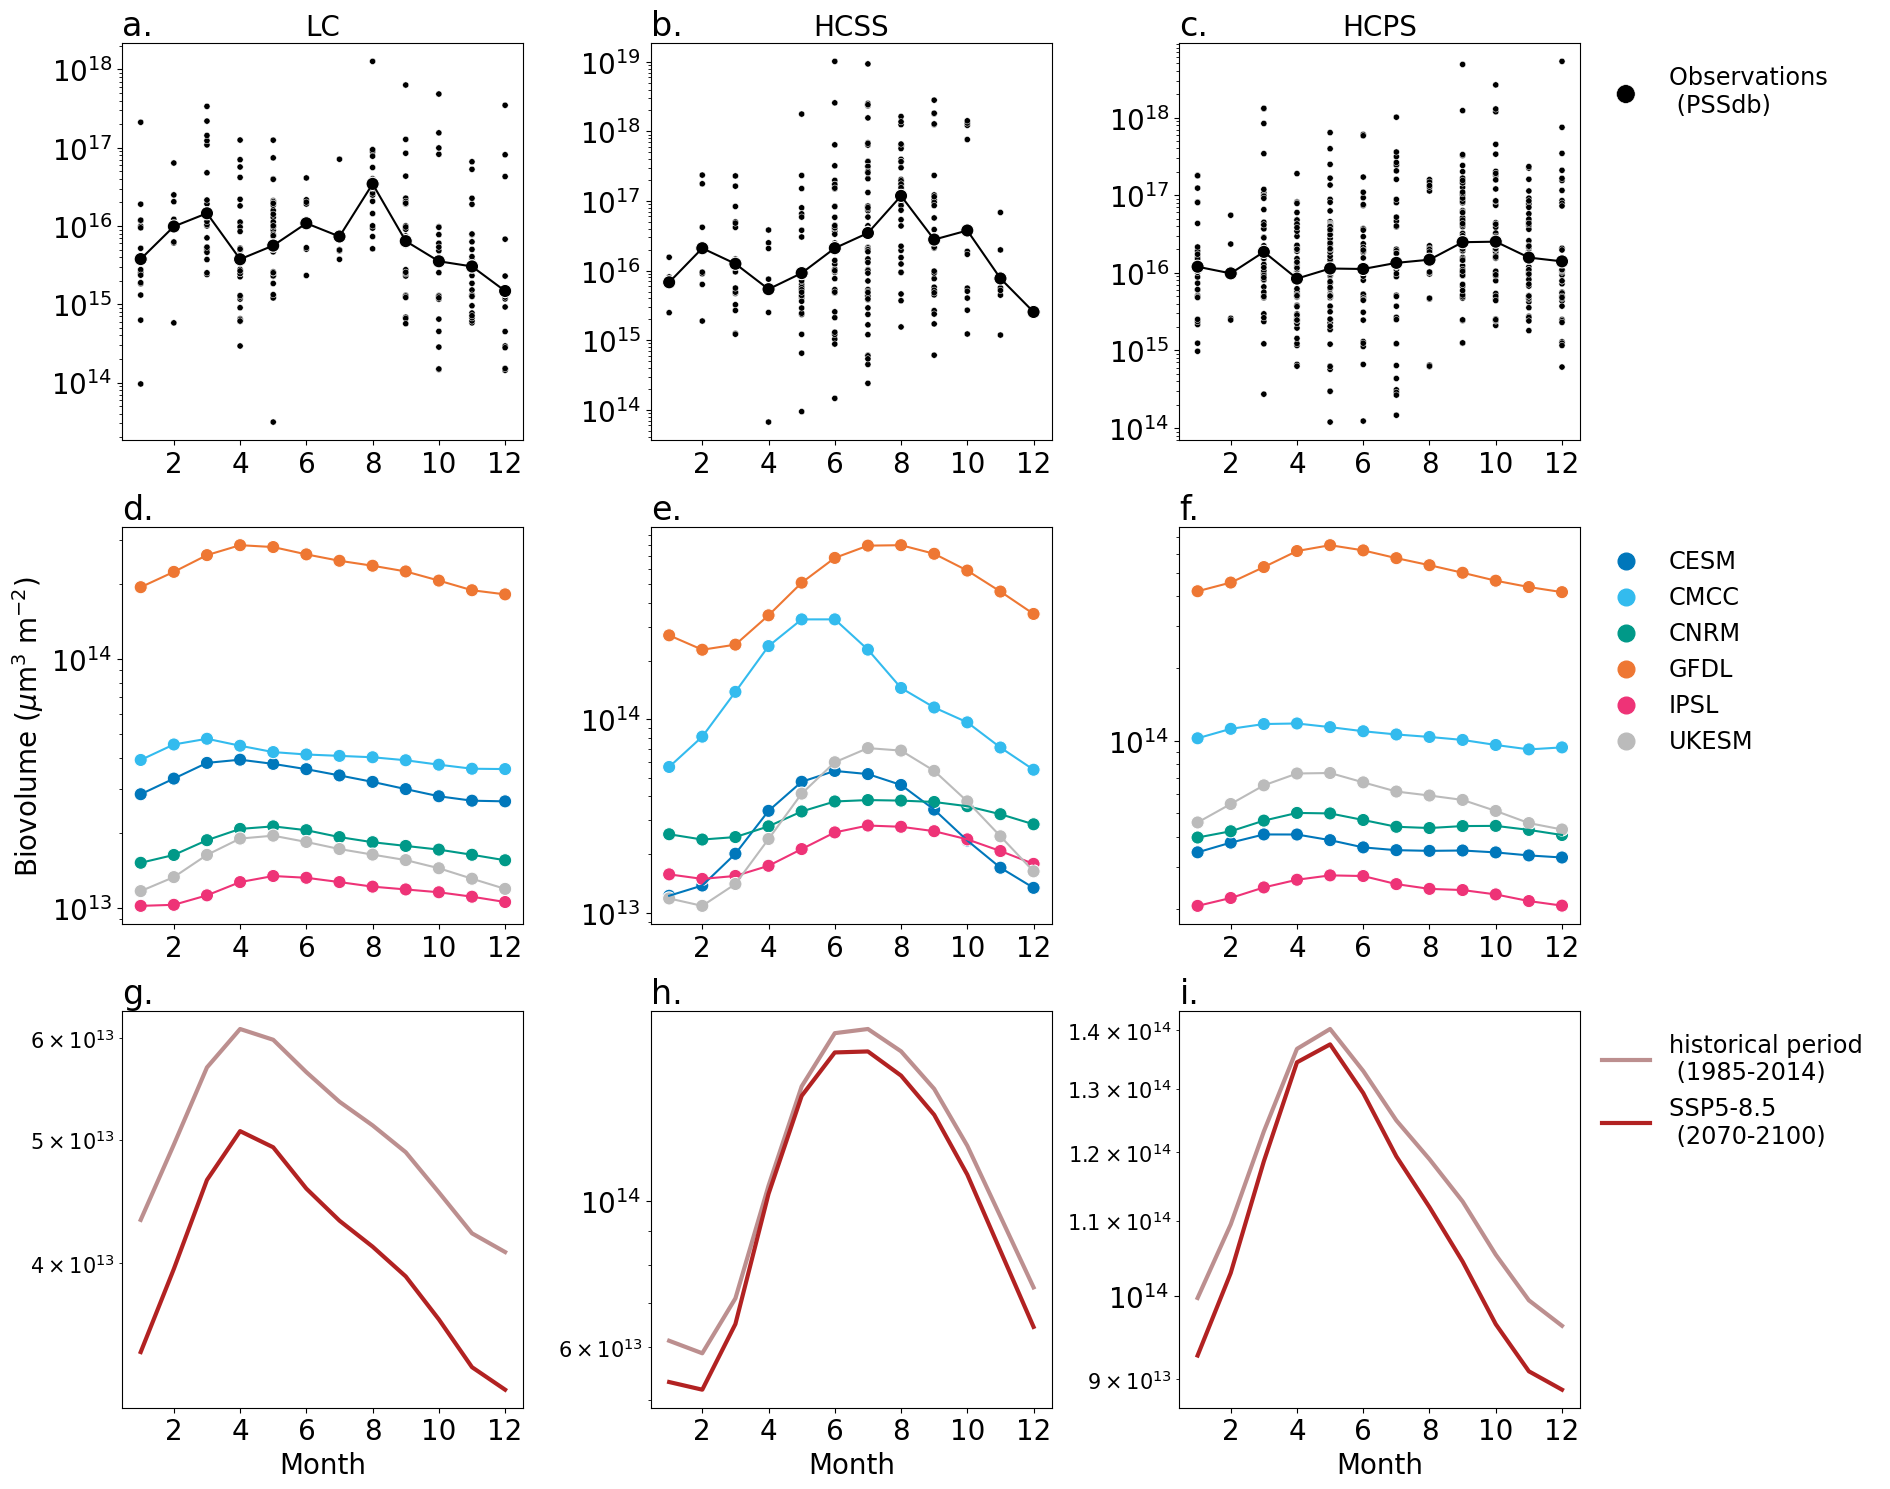

In [22]:
#df_climatology_full = df_climatology_full.loc[df_climatology_full.source != 'GISS'].reset_index()
biome_list = ['LC', 'HCSS', 'HCPS']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(19,15))
ind=0

for r in [0,1,2]:
    for c, m in enumerate(biome_list):
        ax_n = axs[r,c]
        ind +=1
        ax_n.set_title(letters_clim[ind-1], loc='left', fontsize=24)
        if r==0:
            sns.scatterplot(ax=ax_n, x='month', y='total_biovolume', hue='source', markers=[ "o"], palette=palette_source, s=20, data=df_PSSdb[df_PSSdb['biomes']== m], legend=False)
            sns.scatterplot(ax=ax_n, x='month', y='total_biovolume', hue='source',markers=[ "o"], palette=palette_source, s=90, data=df_PSSdb_mean[df_PSSdb_mean['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='total_biovolume', hue='source', palette=palette_source, data=df_PSSdb_mean[df_PSSdb_mean['biomes']== m], ci=None, legend=False)
            ax_n.set_title(m, fontsize=20)
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            #ax_n.set_ylim(9, 13)
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                ax_n.legend(['Observations \n (PSSdb)'],fontsize = 'xx-large',  markerscale=3, frameon=False, bbox_to_anchor=(1, 1))

        elif r==1:
            sns.scatterplot(ax=ax_n, x='month', y='total_biovolume', hue='source', markers=["o"], palette=palette_source, s=90, data=df_hist[df_hist['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='total_biovolume', hue='source', palette=palette_source, data=df_hist[df_hist['biomes']== m], legend=False)
            ax_n.set_title('')
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            if c==0:
                ax_n.set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 20)
            else:
                ax_n.set_ylabel('')
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                 ax_n.legend(fontsize = 'xx-large',  markerscale=2, frameon=False, bbox_to_anchor=(1, 1))

            #ax_n.set_ylim(12.5, 15)
        else:
            #palette = {'CESM': 'tab:red','CMCC': 'tab:blue','CNRM': 'tab:gray','GFDL': 'tab:green','IPSL': 'tab:yellow','UKESM': 'tab:purple'}
            sns.lineplot(ax = ax_n,x = 'month', y='total_biovolume', hue='experiment', hue_order=['hist', 'ssp5', 'obs'],palette = palette_experiments, data=df_mean_experiments[df_mean_experiments['biomes']== m],linewidth = 3, ci=None)
            ax_n.set_title('')
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.tick_params(axis='both', which='minor', labelsize=15)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('Month', fontsize=20)
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                ax_n.legend(['historical period \n (1985-2014)', 'SSP5-8.5 \n (2070-2100)'], fontsize = 'xx-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))

        ax_n.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax_n.set_yscale('log')
           
plt.tight_layout()
plt.savefig('/Users/mc4214/GIT/CMIP6_size_spectra/figures/fig_biomes_climatology_mean_biovolume_PSSdb_new_HCSS_No_GISS.pdf', dpi=300)

## climatologies for GISS

In [2]:
df_climatology_full = pd.read_csv('/work/m1c/CMIP6_biome_PSS_data/biom_climatology_all_biovolume.csv', sep= ',', index_col = False)
df_climatology_full['biovol_log']=np.log10(df_climatology_full.total_biovolume)
#df_climatology_full = df_climatology_full.loc[(df_climatology_full.source != 'GISS')].reset_index(drop=True)
df_clim_mean = df_climatology_full.astype(dict(zip(['month'],[str]))).groupby(['month', 'experiment', 'biomes','source']).apply(lambda x: pd.Series({

                                                                    'slope':np.nanmean(x.slope),
                                                                    'intercept':np.nanmean(x.intercept),
                                                                    'R2':np.nanmean(x.R2),
                                                                    'total_biovolume':np.nanmean(x.total_biovolume)})).reset_index()
#df_clim_mean['source'] = 'models'
df_clim_mean['month'] = df_clim_mean['month'].astype('float')
df_climatology_full['intercept_un']= (df_climatology_full['intercept'])#10**(df_climatology_full['intercept'])
df_clim_mean

,month,experiment,biomes,source,slope,intercept,R2,total_biovolume
0,1.0,hist,HCPS,CESM,-1.045438,2.222158e+13,0.969922,3.441596e+13
1,1.0,hist,HCPS,CMCC,-1.137773,5.110398e+13,0.988469,1.024838e+14
2,1.0,hist,HCPS,CNRM,-1.234864,4.080175e+14,0.936662,3.965604e+13
3,1.0,hist,HCPS,GFDL,-1.152786,1.194688e+15,0.986870,4.184953e+14
4,1.0,hist,HCPS,IPSL,-1.275587,4.469395e+14,0.942220,2.061771e+13
...,...,...,...,...,...,...,...,...
427,9.0,ssp5,LC,CMCC,-1.177965,3.685483e+13,0.991127,3.481285e+13
428,9.0,ssp5,LC,CNRM,-1.301719,4.687814e+14,0.951673,1.381815e+13
429,9.0,ssp5,LC,GFDL,-1.181614,6.319084e+14,0.994295,1.689340e+14
430,9.0,ssp5,LC,IPSL,-1.309669,4.248652e+14,0.958397,1.144161e+13


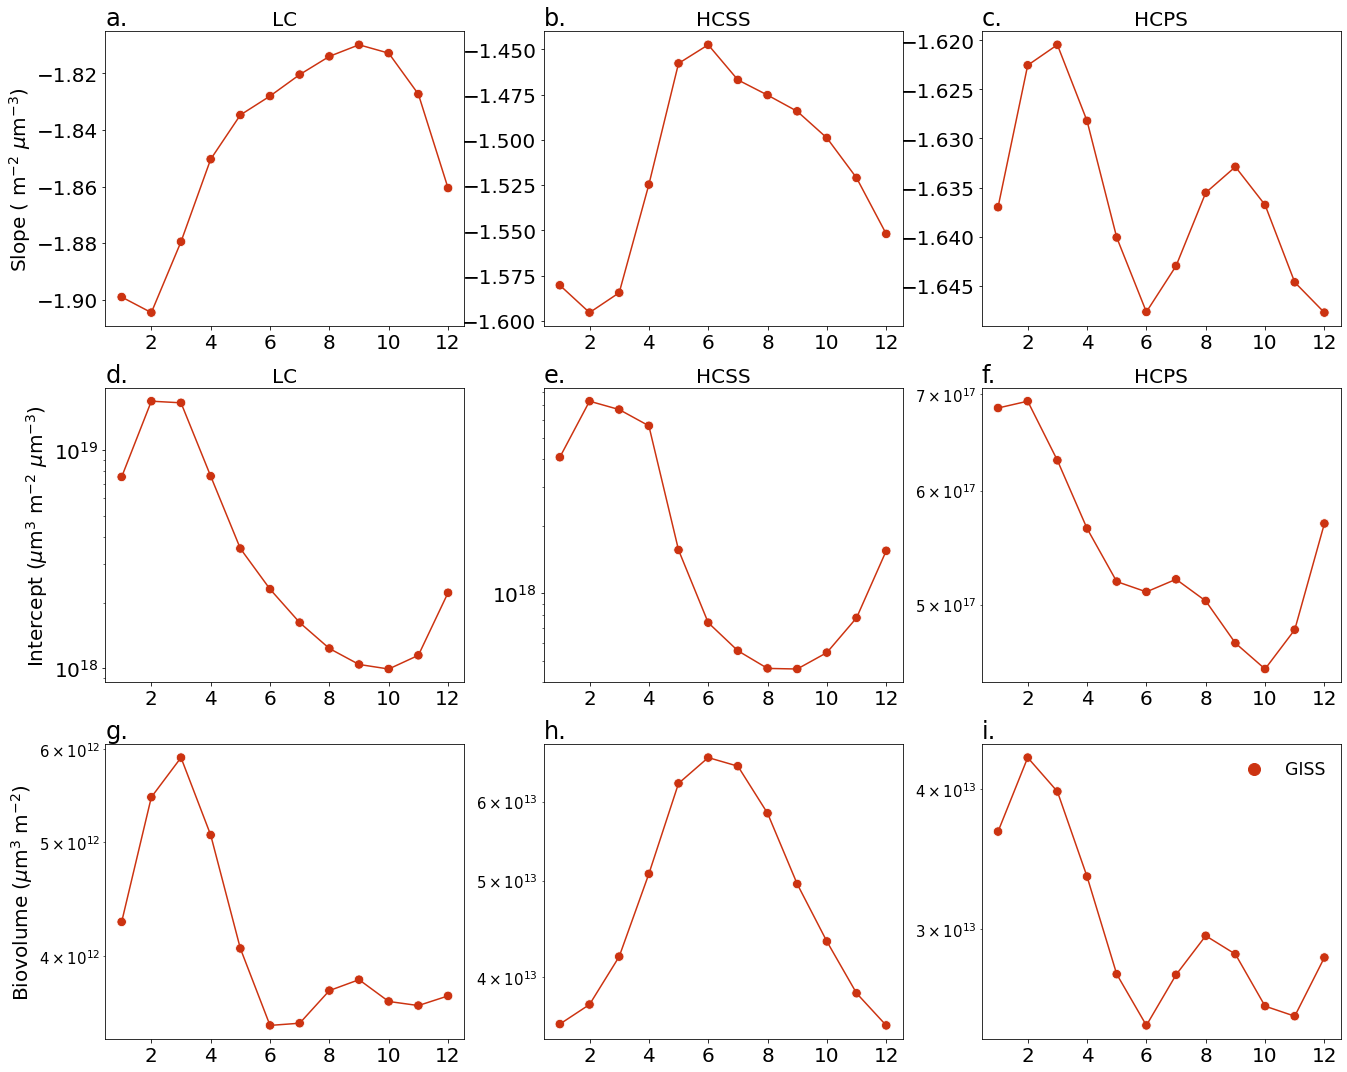

In [41]:
#df_climatology_full = df_climatology_full.loc[df_climatology_full.source != 'GISS'].reset_index()
biome_list = ['LC', 'HCSS', 'HCPS']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(19,15))
ind=0
letters_clim = ['a.','b.','c.', 'd.','e.','f.', 'g.','h.','i.']
for r in [0,1,2]:
    for c, m in enumerate(biome_list):
        ax_n = axs[r,c]
        ind +=1
        ax_n.set_title(letters_clim[ind-1], loc='left', fontsize=24)
        if r==0:
            sns.scatterplot(ax=ax_n, x='month', y='slope', hue='source', markers=[ "o"], palette=palette_source, s=90, data=df_hist_GISS[df_hist_GISS['biomes']== m], legend=False)
            #sns.scatterplot(ax=ax_n, x='month', y='slope', hue='source',markers=[ "o"], palette=palette_source, s=90, data=df_PSSdb_mean[df_PSSdb_mean['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='slope', hue='source', palette=palette_source, data=df_hist_GISS[df_hist_GISS['biomes']== m], ci=None, legend=False)
            ax_n.set_title(m, fontsize=20)
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            #ax_n.set_ylim(9, 13)
            if c==0:
                ax_n.set_ylabel(r'Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 20)
        elif r==1:
            sns.scatterplot(ax=ax_n, x='month', y='intercept', hue='source', markers=[ "o"], palette=palette_source, s=90, data=df_hist_GISS[df_hist_GISS['biomes']== m], legend=False)
            #sns.scatterplot(ax=ax_n, x='month', y='slope', hue='source',markers=[ "o"], palette=palette_source, s=90, data=df_PSSdb_mean[df_PSSdb_mean['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='intercept', hue='source', palette=palette_source, data=df_hist_GISS[df_hist_GISS['biomes']== m], ci=None, legend=False)
            ax_n.set_title(m, fontsize=20)
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.tick_params(axis='both', which='minor', labelsize=15)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            ax_n.set_yscale('log')
            #ax_n.set_ylim(9, 13)
            if c==0:
                ax_n.set_ylabel(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 20)
                

        else:
            sns.scatterplot(ax=ax_n, x='month', y='total_biovolume', hue='source', markers=["o"], palette=palette_source, s=90, data=df_hist_GISS[df_hist_GISS['biomes']== m])
            sns.lineplot(ax=ax_n, x='month', y='total_biovolume', hue='source', palette=palette_source, data=df_hist_GISS[df_hist_GISS['biomes']== m], legend=False)
            ax_n.set_title('')
            ax_n.tick_params(axis='both', which='major', labelsize=20)
            ax_n.tick_params(axis='both', which='minor', labelsize=15)
            ax_n.set_ylabel('')
            ax_n.set_xlabel('')
            ax_n.xaxis.set_major_locator(plt.MaxNLocator(6))
            ax_n.set_yscale('log')
            if c==0:
                ax_n.set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 20)
            else:
                ax_n.set_ylabel('')
            if c <2:
                ax_n.get_legend().remove()
            elif c==2:
                 ax_n.legend(fontsize = 'xx-large',  markerscale=2, frameon=False, bbox_to_anchor=(1, 1))

            #ax_n.set_ylim(12.5, 15)

        ax_n.xaxis.set_major_locator(MaxNLocator(integer=True))
        
           
plt.tight_layout()
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_biomes_climatology_all_GISS_only.pdf', dpi=300)